<a href="https://colab.research.google.com/github/Marcll0/Python/blob/main/CarteiraMarkowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-datareader yfinance pandas numpy matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas_datareader.data as pdr
import yfinance

In [3]:
yfinance.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [27]:
ativos = ['YDUQ3.SA', 'CMIN3.SA', 'UGPA3.SA', 'PETR4.SA', 'CYRE3.SA','BBAS3.SA','PETR3.SA','IRBR3.SA','BRFS3.SA','COGN3.SA']
data_inicial = "2023-06-03"
data_final = "2024-06-03"

In [28]:
Ativos = pdr.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]

display(Ativos)

[*********************100%%**********************]  10 of 10 completed


Ticker,BBAS3.SA,BRFS3.SA,CMIN3.SA,COGN3.SA,CYRE3.SA,IRBR3.SA,PETR3.SA,PETR4.SA,UGPA3.SA,YDUQ3.SA
Date,,,,,,,,,,
2023-06-05,21.468771,8.650000,4.360901,2.96,18.310802,39.209999,25.220465,22.279795,17.503139,14.866384
2023-06-06,21.716745,8.660000,4.397780,3.07,18.636244,40.840000,25.731302,22.750210,17.396116,15.632993
2023-06-07,21.707207,8.710000,4.250266,3.11,18.741533,38.290001,26.530514,23.415277,17.240446,16.244339
2023-06-09,22.765863,8.830000,4.204167,3.19,18.559669,37.990002,27.807604,24.558870,17.610163,16.137594
2023-06-12,23.590851,8.870000,4.130410,3.23,18.301233,37.709999,28.161892,24.988731,17.444763,16.419008
...,...,...,...,...,...,...,...,...,...,...
2024-05-24,27.080000,19.080000,5.290000,1.96,19.580000,33.720001,38.310001,36.610001,23.840000,13.630000
2024-05-27,27.410000,19.330000,5.340000,1.94,19.629999,33.250000,38.700001,37.009998,23.969999,13.090000
2024-05-28,27.320000,19.139999,5.130000,1.90,19.370001,32.790001,39.380001,37.799999,23.969999,13.070000


In [29]:
Ativos.describe()

Ticker,BBAS3.SA,BRFS3.SA,CMIN3.SA,COGN3.SA,CYRE3.SA,IRBR3.SA,PETR3.SA,PETR4.SA,UGPA3.SA,YDUQ3.SA
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,25.720527,12.902996,5.147075,2.806964,21.128962,42.034696,34.928242,32.661322,23.135170,18.811997
std,2.315035,3.233535,1.111956,0.451816,1.886210,4.136893,4.157452,4.735808,4.312103,2.367511
min,21.468771,8.300000,3.733964,1.860000,17.076046,31.559999,25.220465,22.279795,17.162611,12.110000
25%,23.363400,9.755000,4.107361,2.450000,19.572353,39.675001,31.993700,29.035028,18.481517,17.968493
50%,25.963634,13.000000,4.951150,2.880000,21.325914,41.009998,34.841496,32.906067,24.280415,19.301067
75%,27.905000,15.255000,6.090011,3.230000,22.507010,43.500000,38.211418,36.628916,26.936655,20.478580
max,29.474905,19.650000,7.711440,3.520000,24.764929,54.060001,44.470001,41.669998,30.651310,23.289373


In [30]:
Ativos.columns

Index(['BBAS3.SA', 'BRFS3.SA', 'CMIN3.SA', 'COGN3.SA', 'CYRE3.SA', 'IRBR3.SA',
       'PETR3.SA', 'PETR4.SA', 'UGPA3.SA', 'YDUQ3.SA'],
      dtype='object', name='Ticker')

In [31]:
Ativos.head()

Ticker,BBAS3.SA,BRFS3.SA,CMIN3.SA,COGN3.SA,CYRE3.SA,IRBR3.SA,PETR3.SA,PETR4.SA,UGPA3.SA,YDUQ3.SA
Date,,,,,,,,,,
2023-06-05,21.468771,8.65,4.360901,2.96,18.310802,39.209999,25.220465,22.279795,17.503139,14.866384
2023-06-06,21.716745,8.66,4.397780,3.07,18.636244,40.840000,25.731302,22.750210,17.396116,15.632993
2023-06-07,21.707207,8.71,4.250266,3.11,18.741533,38.290001,26.530514,23.415277,17.240446,16.244339
2023-06-09,22.765863,8.83,4.204167,3.19,18.559669,37.990002,27.807604,24.558870,17.610163,16.137594
2023-06-12,23.590851,8.87,4.130410,3.23,18.301233,37.709999,28.161892,24.988731,17.444763,16.419008


In [32]:
# Calcular os retornos diários dos ativos financeiros a partir dos preços históricos:
retornos = Ativos.pct_change().dropna()

In [33]:
retornos

Ticker,BBAS3.SA,BRFS3.SA,CMIN3.SA,COGN3.SA,CYRE3.SA,IRBR3.SA,PETR3.SA,PETR4.SA,UGPA3.SA,YDUQ3.SA
Date,,,,,,,,,,
2023-06-06,0.011550,0.001156,0.008457,0.037162,0.017773,0.041571,0.020255,0.021114,-0.006115,0.051567
2023-06-07,-0.000439,0.005774,-0.033543,0.013029,0.005650,-0.062439,0.031060,0.029233,-0.008949,0.039106
2023-06-09,0.048770,0.013777,-0.010846,0.025724,-0.009704,-0.007835,0.048137,0.048840,0.021445,-0.006571
2023-06-12,0.036238,0.004530,-0.017544,0.012539,-0.013925,-0.007370,0.012741,0.017503,-0.009392,0.017438
2023-06-13,-0.010408,-0.003382,-0.015625,-0.046440,-0.016214,-0.009547,0.000421,-0.001951,-0.006135,-0.034870
...,...,...,...,...,...,...,...,...,...,...
2024-05-24,0.005197,-0.007800,0.000000,-0.020000,0.011364,-0.007359,-0.003382,-0.005433,-0.001257,-0.009448
2024-05-27,0.012186,0.013103,0.009452,-0.010204,0.002554,-0.013938,0.010180,0.010926,0.005453,-0.039618
2024-05-28,-0.003283,-0.009829,-0.039326,-0.020619,-0.013245,-0.013835,0.017571,0.021346,0.000000,-0.001528


In [34]:
# Calcular a matriz de covariância dos retornos:
covariancia = retornos.cov()

In [35]:
# Matriz de covariância dos retornos
covariancia

Ticker,BBAS3.SA,BRFS3.SA,CMIN3.SA,COGN3.SA,CYRE3.SA,IRBR3.SA,PETR3.SA,PETR4.SA,UGPA3.SA,YDUQ3.SA
Ticker,,,,,,,,,,
BBAS3.SA,0.000165,0.000070,0.000063,0.000118,0.000109,0.000087,0.000063,0.000067,0.000078,0.000104
BRFS3.SA,0.000070,0.000877,0.000082,0.000212,0.000168,0.000225,0.000026,0.000018,0.000085,0.000222
CMIN3.SA,0.000063,0.000082,0.000443,0.000182,0.000113,0.000053,0.000057,0.000056,0.000111,0.000097
COGN3.SA,0.000118,0.000212,0.000182,0.000787,0.000341,0.000205,0.000074,0.000065,0.000158,0.000627
CYRE3.SA,0.000109,0.000168,0.000113,0.000341,0.000489,0.000220,0.000023,0.000016,0.000146,0.000359
IRBR3.SA,0.000087,0.000225,0.000053,0.000205,0.000220,0.001030,0.000025,0.000016,0.000066,0.000263
PETR3.SA,0.000063,0.000026,0.000057,0.000074,0.000023,0.000025,0.000395,0.000359,0.000051,0.000065
PETR4.SA,0.000067,0.000018,0.000056,0.000065,0.000016,0.000016,0.000359,0.000349,0.000047,0.000061
UGPA3.SA,0.000078,0.000085,0.000111,0.000158,0.000146,0.000066,0.000051,0.000047,0.000253,0.000141


In [36]:
# função objetivo para minimizar a variância da carteira, dada uma taxa de retorno desejada:
def funcao_objetivo(pesos, covariancia, retorno_esperado):
    variancia = np.dot(pesos.T, np.dot(covariancia, pesos))
    penalidade = 10000 * abs(retorno_esperado - np.dot(pesos.T, retornos.mean()))
    return variancia + penalidade

In [45]:
# Definir um valor de retorno esperado desejado e otimizar a alocação de ativos usando a função minimize do pacote SciPy:
retorno_esperado = 0.10 # exemplo de retorno esperado de 10%
pesos_iniciais = np.ones((len(retornos.columns))) / len(retornos.columns) # alocação inicial igual para todos os ativos
limites = [(0,1) for i in range(len(retornos.columns))] # limites de alocação entre 0% e 100%
otimizacao = minimize(funcao_objetivo, pesos_iniciais, args=(covariancia, retorno_esperado), bounds=limites, constraints=[{'type': 'eq', 'fun': lambda x: np.sum(x)-1}])

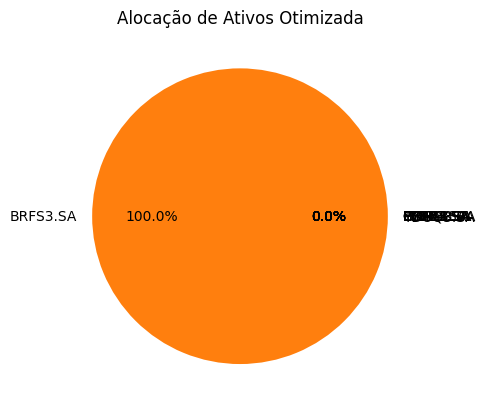

In [46]:
pesos_otimizados = otimizacao.x
fig, ax = plt.subplots()
ax.pie(pesos_otimizados, labels=retornos.columns, autopct='%1.1f%%')
ax.set_title('Alocação de Ativos Otimizada')
plt.show()

In [47]:
## Risco da Carteira
volatilidade = np.sqrt(np.dot(pesos_otimizados.T, np.dot(covariancia, pesos_otimizados)))
volatilidade

0.029611696659069604